# 修改公式——3

一楼和顶楼使用单独公式

其他楼层使用同样公式

## 中高层一楼公式

In [1]:
import pandas as pd 
data = pd.read_excel(r'C:\Users\Dl\Desktop\宿州市住宅类可比实例入库版20180529.xlsx')
data = data[4300:]
data.info()
DEGREE = 3

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6412 entries, 4300 to 10711
Data columns (total 14 columns):
城市      6412 non-null object
行政区域    6412 non-null object
类型      6412 non-null object
小区名称    6412 non-null object
地址      6392 non-null object
所在楼层    6412 non-null int64
总楼层     6412 non-null int64
面积      6412 non-null float64
结构      6412 non-null object
建筑年代    6412 non-null int64
朝向      6412 non-null object
装修      6412 non-null object
买卖时间    6412 non-null datetime64[ns]
单价      6412 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(3), object(8)
memory usage: 701.4+ KB


D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://p

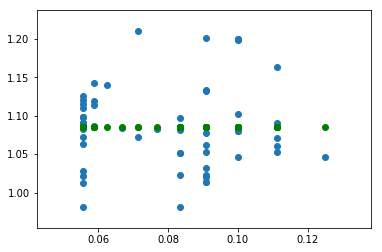

In [2]:
def divide_data(data,rg = [8,18]):
    return data[(data['总楼层']>=8)&(data['总楼层']<=18)]

def process(data):
    # data = data[(data['所在楼层'] != 1)&(data['所在楼层'] != data['总楼层'])]
    data['ratio'] = data['所在楼层']/data['总楼层']
    pivot_price = {}
    for name,group in data.groupby('小区名称'):
        pivot_price[name] = group['单价'].mean()
    data['pivot'] = data['小区名称'].apply(lambda x:pivot_price[x])
    data['ratio_price'] = data['单价']/data['pivot']
    return data

data1 = divide_data(data)
data1 = process(data1)
data1 = data1[data1['所在楼层']==1]
x = data1['ratio']
y = data1['ratio_price']
from sklearn.linear_model import RidgeCV
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import PolynomialFeatures
import numpy as np 
pf = PolynomialFeatures(degree=DEGREE)
x = x.reshape(-1,1)
x = pf.fit_transform(x)
clf = RidgeCV(alphas=[1e-5,1e-4,1e-3,1e-2,1e-1,1])
clf.fit(x,y)
yp = clf.predict(x)
plt.scatter(x[:,1],y)
plt.scatter(x[:,1],yp,color='g')


D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  


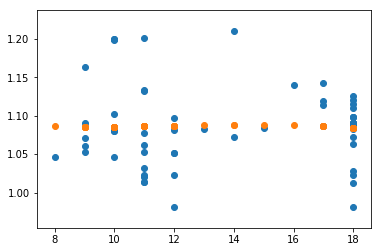

In [4]:
data = process(data)
data2 = data[(data['总楼层']>=8)&(data['所在楼层']==1)&(data['总楼层']<=18)]
# data = data[(data['总楼层']>=8)]
a = data2['总楼层']
b = data2['ratio_price']
a = a.reshape(-1,1)
a = pf.fit_transform(a)
clf.fit(a,b)
bp = clf.predict(a)
plt.scatter(a[:,1],b)
plt.scatter(a[:,1],bp)

In [5]:
clf.coef_,clf.intercept_

(array([ 0.00000000e+00, -1.54738265e-02,  1.33860137e-03, -3.66947988e-05]),
 1.143151030977005)

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """


(array([ 0.00000000e+00,  4.52393685e-01, -1.74461030e-02,  2.18679081e-04]),
 -2.7133170646030784)

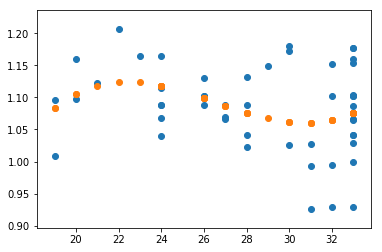

In [6]:
data3 = data[(data['总楼层']>=19)&(data['所在楼层']==1)&(data['总楼层']<=33)]
# data = data[(data['总楼层']>=8)]
a = data3['总楼层']
b = data3['ratio_price']
a = a.reshape(-1,1)
a = pf.fit_transform(a)
clf.fit(a,b)
bp = clf.predict(a)
plt.scatter(a[:,1],b)
plt.scatter(a[:,1],bp)
clf.coef_,clf.intercept_

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:928: RuntimeWarning: invalid value encountered in true_divide
  return (c / G_diag) ** 2, c


(array([0., 0., 0., 0.]), 0.9963161419959813)

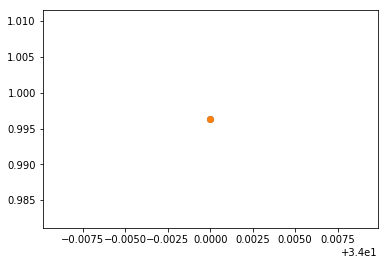

In [9]:
data4 = data[(data['总楼层']>=34)&(data['所在楼层']==1)&(data['总楼层']<=45)]
# data = data[(data['总楼层']>=8)]
a = data4['总楼层']
b = data4['ratio_price']
a = a.reshape(-1,1)
a = pf.fit_transform(a)
clf.fit(a,b)
bp = clf.predict(a)
plt.scatter(a[:,1],b)
plt.scatter(a[:,1],bp)
clf.coef_,clf.intercept_

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  after removing the cwd from sys.path.


(array([ 0.00000000e+00,  1.75902176e-02, -1.02266166e-03,  1.64199755e-05]),
 1.0180862778221988)

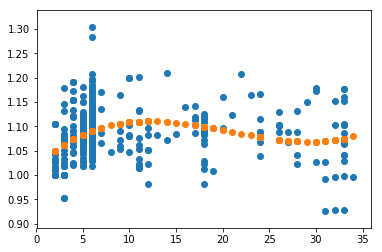

In [11]:
data5 = data[data['所在楼层']==1]
a = data5['总楼层']
b = data5['ratio_price']
a = a.reshape(-1,1)
a = pf.fit_transform(a)
clf.fit(a,b)
bp = clf.predict(a)
plt.scatter(a[:,1],b)
plt.scatter(a[:,1],bp)
clf.coef_,clf.intercept_